In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def print_graph(values, thresholds):
    plt.figure()
    plt.xlim(0, len(values))
    plt.ylim(0, 100)
    plt.plot(values)
    plt.plot(thresholds)
    plt.show()

In [86]:
# 이동평균선과 multiple of stdev band 를 바탕으로 adaptive threshold 구현 시도

In [87]:
# 표준편차에 대한 multiple 선정

# 60초에 최대 6 번의 명령어가 가능하다고 가정하면, 1/10 ~= 0.1 의 확률
# 즉, 정규분포 기준으로 양 쪽에 0.05 정도의 확률이 매핑되고, 이러한 확률을 만들어주는 x 값은 1.6449 이다.

# 60초에 6 번보다 더 많은 명령어를 꾸준히 진행한다면 더 이상 인식이 되기 힘들다. (표준편차가 높아져서)
# 60초에 6 번보다 더 적은 명령어를 진행한다면 오히려 인식하기 더 쉽다. (표준편차가 줄어들어서)

multiple = 1.6449

[1.5895603040723358, 0, 21.730994892211562, 0, 70.3175443664083, 63.311836546458586, 66.30270357437976, 0, 0, 75.12245341996746, 52.24047274532028, 119.75804516982656, 0, 0, 0, 0, 0, 3.024823943250947, 70.73936299099381, 38.25204651344713, 0, 59.27559019976707, 47.80454572745177, 1.9312868272681563, 29.735015242315278, 0, 148.96847991229222, 47.84333799231328, 9.30636108711336, 26.051869013231105, 73.03965806427684, 27.9241448492843, 2.6983915464534682, 40.959856976134745, 67.05843113101994, 0, 10.920787079705146, 112.22263548895907, 0, 54.42006147948291, 115.21817318202133, 127.81251302923464, 97.72908414377748, 18.079415386834246, 42.14359413606792, 0, 0, 0, 2.8258916568925727, 22.63374189836301, 62.88421800828691, 17.395703663474823, 11.43604966913733, 0, 0, 41.51712023136726, 8.458449924830589, 23.252891845094403, 39.48740192593371, 0, 11.579786138139472, 84.57387611403217, 32.88066555344152, 83.74123772181181, 91.04550108589187, 0, 62.285369845078826, 9.41893492179229, 0, 0, 47.53

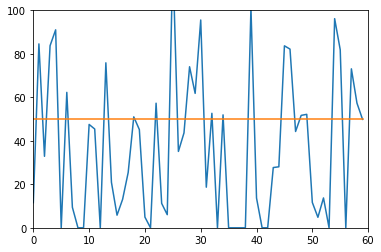

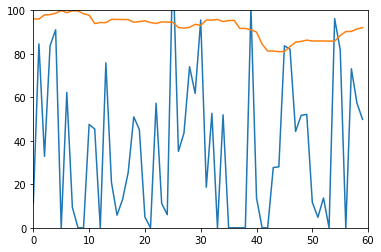

In [88]:
# Experiment 1 - scale is huge

np.random.seed(777)

loc = 25
scale = 50
length = 60 # 60 만큼의 length 동안 threshold 알고리즘 작동
size = length * 2

scores = np.random.normal(loc=loc, scale=scale, size=size)
scores = [ score if score > 0 else 0 for score in scores ]

print(scores)


# 1. fixed threshold

values = scores[length:]

thresholds = [ 50 for _ in range(len(values)) ]

print_graph(values, thresholds)

# 2. standard deviation band threshold

values = scores[length:]

thresholds = np.array([ sum(scores[i-length+1:i]) / length for i in range(length, size) ]) + multiple * np.array([ np.std(scores[i-length+1:i]) for i in range(length, size)])

print_graph(values, thresholds)

[13.294780152036168, 4.429378649424084, 23.36549744610578, 7.165951895054803, 47.65877218320415, 44.15591827322929, 45.65135178718988, 0, 0, 50.06122670998373, 38.620236372660145, 72.37902258491329, 5.766063634167946, 0, 9.188312368992365, 11.028158305353971, 0, 14.012411971625474, 47.869681495496906, 31.626023256723563, 0, 42.13779509988353, 36.402272863725884, 13.465643413634078, 27.36750762115764, 0, 86.98423995614611, 36.42166899615664, 17.15318054355668, 25.525934506615553, 49.01982903213842, 26.462072424642148, 13.849195773226734, 32.97992848806737, 46.02921556550997, 0, 17.960393539852575, 68.61131774447954, 8.144027264089331, 39.710030739741455, 70.10908659101067, 76.40625651461733, 61.36454207188874, 21.53970769341712, 33.57179706803396, 6.8095379547736705, 0, 0, 13.912945828446286, 23.816870949181506, 43.942109004143454, 21.197851831737413, 18.218024834568666, 10.004000661159838, 0, 33.25856011568363, 16.729224962415294, 24.1264459225472, 32.243700962966855, 9.843251287376676

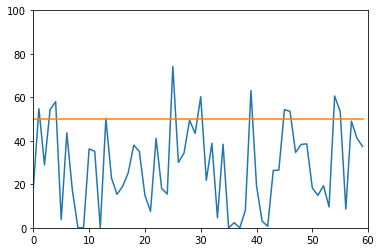

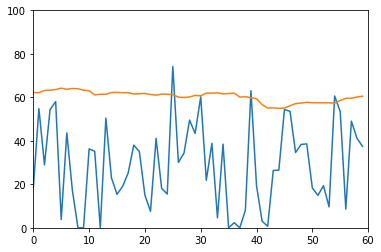

In [89]:
# Experiment 2 - scale is medium

np.random.seed(777)

loc = 25
scale = 25
length = 60 # 60 만큼의 length 동안 threshold 알고리즘 작동
size = length * 2

scores = np.random.normal(loc=loc, scale=scale, size=size)
scores = [ score if score > 0 else 0 for score in scores ]

print(scores)


# 1. fixed threshold

values = scores[length:]

thresholds = [ 50 for _ in range(len(values)) ]

print_graph(values, thresholds)

# 2. standard deviation band threshold

values = scores[length:]

thresholds = np.array([ sum(scores[i-length+1:i]) / length for i in range(length, size) ]) + multiple * np.array([ np.std(scores[i-length+1:i]) for i in range(length, size)])

print_graph(values, thresholds)

[22.658956030407232, 20.885875729884816, 24.673099489221155, 21.43319037901096, 29.53175443664083, 28.83118365464586, 29.130270357437976, 18.381586072596043, 16.23777738019264, 30.012245341996746, 27.72404727453203, 34.475804516982656, 21.153212726833587, 17.98452041031966, 21.837662473798474, 22.205631661070793, 18.833843076067833, 22.802482394325096, 29.57393629909938, 26.325204651344713, 18.08314924266736, 28.42755901997671, 27.280454572745178, 22.693128682726815, 25.473501524231526, 17.285941970304073, 37.39684799122922, 27.284333799231327, 23.430636108711337, 25.105186901323112, 29.803965806427684, 25.29241448492843, 22.769839154645346, 26.595985697613475, 29.205843113101995, 17.336190029471638, 23.592078707970515, 33.72226354889591, 21.628805452817865, 27.94200614794829, 34.02181731820213, 35.281251302923465, 32.272908414377746, 24.307941538683423, 26.714359413606793, 21.361907590954733, 17.980269500715483, 18.79694404090935, 22.782589165689256, 24.763374189836302, 28.78842180082

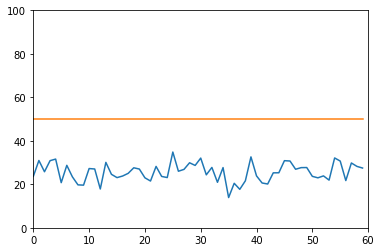

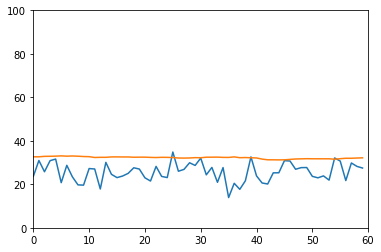

In [90]:
# Experiment 3 - scale is small

np.random.seed(777)

loc = 25
scale = 5
length = 60 # 60 만큼의 length 동안 threshold 알고리즘 작동
size = length * 2

scores = np.random.normal(loc=loc, scale=scale, size=size)
scores = [ score if score > 0 else 0 for score in scores ]

print(scores)


# 1. fixed threshold

values = scores[length:]

thresholds = [ 50 for _ in range(len(values)) ]

print_graph(values, thresholds)

# 2. standard deviation band threshold

values = scores[length:]

thresholds = np.array([ sum(scores[i-length+1:i]) / length for i in range(length, size) ]) + multiple * np.array([ np.std(scores[i-length+1:i]) for i in range(length, size)])

print_graph(values, thresholds)

In [ ]:
# 결론 : threshold 를 사용하는 프로그램에서는 상황마다 측정되는 threshold 가 다르기 때문에, 이에 대한 adaptive threshold algorithm 을 적용해야 한다.
#        다음과 같이, 표준편차의 개념을 바탕으로 상황에 맞게 threshold 가 분포하도록 설계할 수 있었다.
#        처음 데이터들이 아예 0 으로 나오는 경우에는 threshold 값이 0 으로 수렴할 수 있기 때문에 lowest 처리를 따로 해줘야겠다는 생각이 든다.